# Step 1: Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries for data load, examination, outlier remove and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import sklearn.metrics as metrics
#importing the libraries for data regulazation - scale and data split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
#importing the libraries for the ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
#import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#importing the library for save the ML model
import pickle

# Step 2: Load the dataset

In [2]:
#dataset load
dataset=pd.read_csv("MGflowTrainingSteps_bs256_lr0.0001_w16_nl1.csv")

# Step 3: Reading and Understanding the Data
1. Importing data using the pandas library
2. Understanding the structure of the data through seaborn and matplotlib

In [3]:
#examine the initial data
dataset.head()

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss
0,0,2.210460e+06,228.125000,299915.78000,168996.670000,NaN,NaN,130919.1100,468912.44000,299917.8800
1,500,7.672021e+02,1.257812,3576.97170,271.534900,NaN,NaN,3305.4368,3848.50660,3576.9900
2,1000,1.675491e+02,0.249084,-595.43243,63.601997,NaN,NaN,-659.0344,-531.83044,-595.4372
3,1500,8.753711e+01,0.026855,-1278.70970,28.498280,1.0,15.999970,-1307.2080,-1250.21140,-1278.7076
4,2000,6.837085e+01,0.175537,-1426.99100,21.598984,1.0,15.592285,-1448.5900,-1405.39200,-1426.9893


In [4]:
#observe the data size and features
dataset.shape

(1854, 10)

In [5]:
#observe the mean, min and max values for each features
dataset.describe()

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss
count,1854.000000,1.854000e+03,1854.000000,1854.000000,1854.000000,1.851000e+03,1851.000000,1854.000000,1854.000000,1854.000000
mean,463250.000000,1.198830e+03,0.132805,-1516.879929,93.228900,1.000000e+00,3.938477,-1610.108829,-1423.651034,-1516.781103
std,267674.008824,5.133654e+04,5.297939,7005.504051,3924.809154,6.391056e-08,2.301543,3081.873241,10929.980790,7005.550492
min,0.000000,3.786255e+00,0.000000,-1684.622600,1.412894,9.999998e-01,1.577429,-1686.371100,-1682.973000,-1684.471600
25%,231625.000000,4.992157e+00,0.002319,-1684.210750,1.648681,9.999999e-01,2.522199,-1685.910150,-1682.550950,-1684.124225
50%,463250.000000,5.510254e+00,0.005859,-1684.094550,1.731271,1.000000e+00,3.192901,-1685.800300,-1682.375650,-1683.998750
75%,694875.000000,6.317383e+00,0.012054,-1683.897175,1.852222,1.000000e+00,4.495003,-1685.654925,-1682.079675,-1683.789850
max,926500.000000,2.210460e+06,228.125000,299915.780000,168996.670000,1.000000e+00,15.999970,130919.110000,468912.440000,299917.880000


In [6]:
#observe the type for each feature of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Epoch                  1854 non-null   int64  
 1   MaxActionDiff          1854 non-null   float64
 2   MinActionDiff          1854 non-null   float64
 3   MeanActionDiff         1854 non-null   float64
 4   StdActionDiff          1854 non-null   float64
 5   MeanReWeightingFactor  1851 non-null   float64
 6   StdReWeightingFactor   1851 non-null   float64
 7   MeanMinusStd           1854 non-null   float64
 8   MeanPlusStd            1854 non-null   float64
 9   Loss                   1854 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 145.0 KB


# Step 4: Data Cleaning & Preparation Missing Values Check

   
1. Checking for missing values
2. Checking for duplicates
3. Checking for NA values
4. Checking and fixing invalid values  

In [7]:
#check for missing values
dataset.isnull().sum()

Epoch                    0
MaxActionDiff            0
MinActionDiff            0
MeanActionDiff           0
StdActionDiff            0
MeanReWeightingFactor    3
StdReWeightingFactor     3
MeanMinusStd             0
MeanPlusStd              0
Loss                     0
dtype: int64

In [8]:
#checking for duplicates
dataset.loc[dataset.duplicated()]

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss


In [9]:
#checking for NA values and remove them
dataset = dataset.dropna()

# Step 5: Visualizing the data

1. Checking the distribution of the target variable
2. Checking the distribution of other variables
3. Checking variables initial relationship

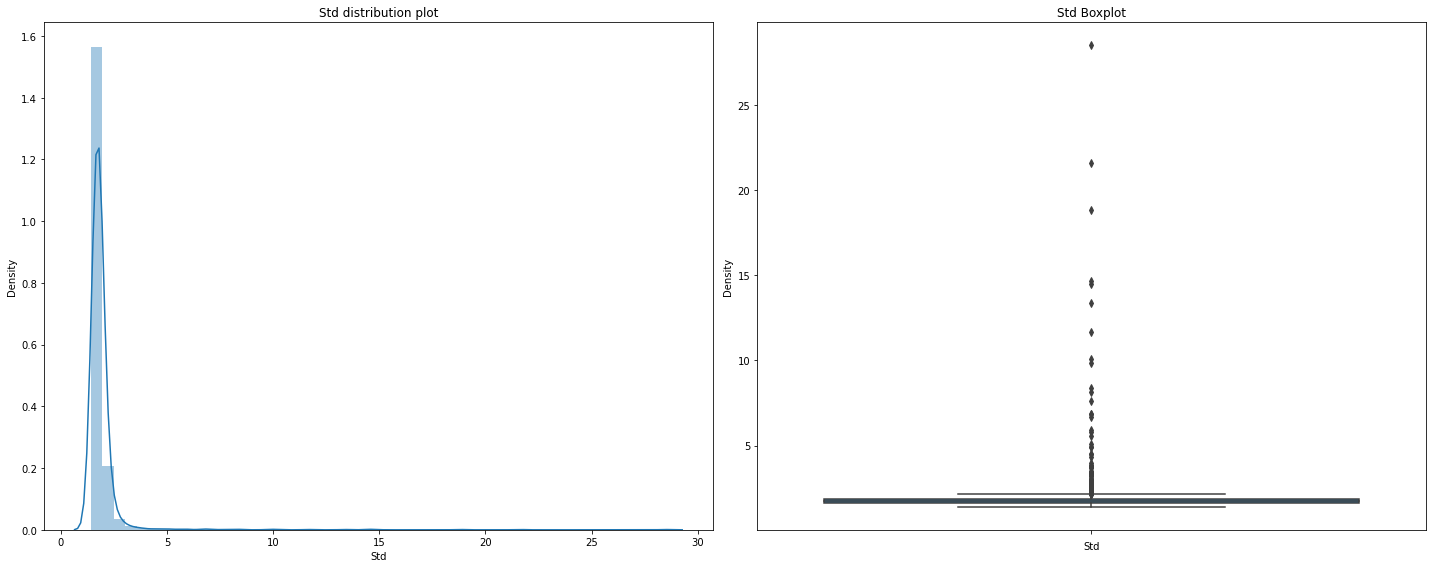

In [10]:
plt.figure(figsize=(20,8))

#Std histogram
plt.subplot(1,2,1)
plt.title('Std distribution plot')
#plt.ylabel('Epoch', size=10)
sns.distplot(dataset.StdActionDiff)
plt.xlabel('Std', size=10)

#Std boxplot
plt.subplot(1,2,2)
plt.title('Std Boxplot')
sns.boxplot(y=dataset.StdActionDiff)
plt.ylabel('Density', size=10)
plt.xlabel('Std', size=10)

plt.tight_layout()
plt.savefig('Std distribution plot.png', dpi=330)
plt.savefig('Std distribution plot.pdf', dpi=330)  
plt.show()

In [11]:
print(dataset.StdActionDiff.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1851.000000
mean        1.898743
std         1.161084
min         1.412894
25%         1.648577
50%         1.730214
75%         1.851269
85%         1.957115
90%         2.102440
100%       28.498280
max        28.498280
Name: StdActionDiff, dtype: float64


# Inference: 


# Step 5.1: Visualising Numerical Data

Visualisin numerical data for Std

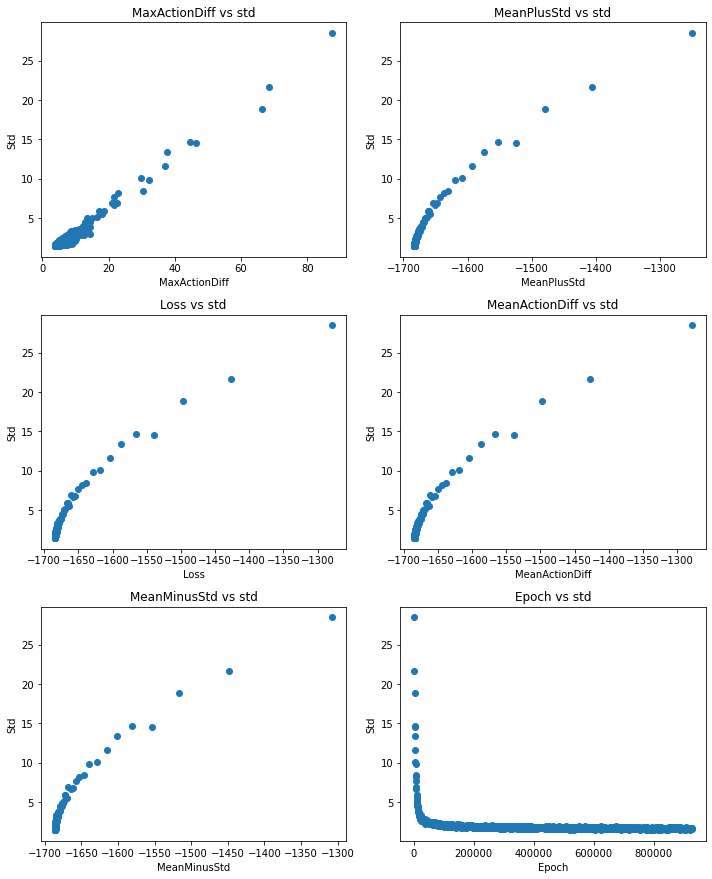

In [12]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(dataset[x],dataset['StdActionDiff'])
    plt.title(x+' vs std')
    plt.ylabel('Std')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('MaxActionDiff', 1)
scatter('MeanPlusStd', 2)
scatter('Loss', 3)
scatter('MeanActionDiff', 4)
scatter('MeanMinusStd', 5)
scatter('Epoch', 6)

plt.tight_layout()
plt.savefig('Std , maxPlusStd, mean, loss, mean, meanMinusStd & epoch: histogram and boxplot.png', dpi=330)
plt.savefig('Std , maxPlusStd, mean, loss, mean, meanMinusStd & epoch: histogram and boxplot.pdf', dpi=330)
plt.show()

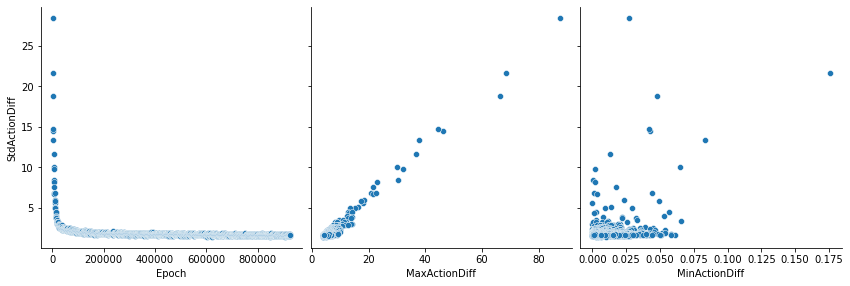

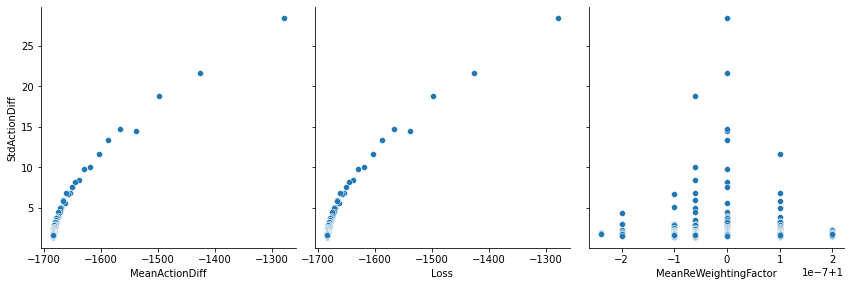

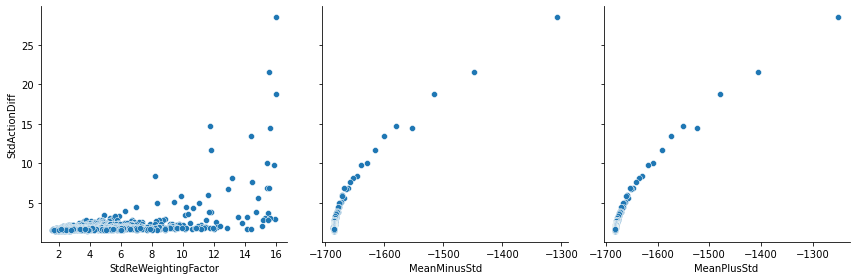

In [17]:
def pp(x,y,z):
    sns.pairplot(dataset, x_vars=[x,y,z], y_vars='StdActionDiff',size=4, aspect=1, kind='scatter')

pp('Epoch', 'MaxActionDiff', 'MinActionDiff')
pp('MeanActionDiff', 'Loss', 'MeanReWeightingFactor')
pp('StdReWeightingFactor', 'MeanMinusStd', 'MeanPlusStd')

plt.tight_layout()
plt.savefig('Data pairplot.png', dpi=330)
plt.savefig('Data pairplot.pdf', dpi=330)
plt.show()

# Inference:
1. maxAction,minAction, meanAction, Loss, meanMinusStd, meanPlusStd - seem to have a significant positive correlation with std.
2. epoch, stdReWeightingFactor, MeanReWeightingFactor - seem to have a significant negative correlation with std.

# Step 5.3: Plotting initial relationships 

In [18]:

#Plotting relationships in the dataset. 
pd.set_option('display.max_columns', None)
dataset.describe()

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000
mean,464000.000000,6.069799,0.008962,-1682.978233,1.898743,1.000000e+00,3.938477,-1684.876975,-1681.079489,-1682.880388
std,267240.996107,3.739244,0.010301,13.371623,1.161084,6.391056e-08,2.301543,12.284796,14.469989,13.365473
min,1500.000000,3.786255,0.000000,-1684.622600,1.412894,9.999998e-01,1.577429,-1686.371100,-1682.973000,-1684.471600
25%,232750.000000,4.991699,0.002319,-1684.210850,1.648577,9.999999e-01,2.522199,-1685.910200,-1682.551050,-1684.124400
50%,464000.000000,5.509521,0.005859,-1684.094700,1.730214,1.000000e+00,3.192901,-1685.800400,-1682.376200,-1683.998900
75%,695250.000000,6.310730,0.011963,-1683.898650,1.851269,1.000000e+00,4.495003,-1685.655400,-1682.080600,-1683.792450
max,926500.000000,87.537110,0.175537,-1278.709700,28.498280,1.000000e+00,15.999970,-1307.208000,-1250.211400,-1278.707600


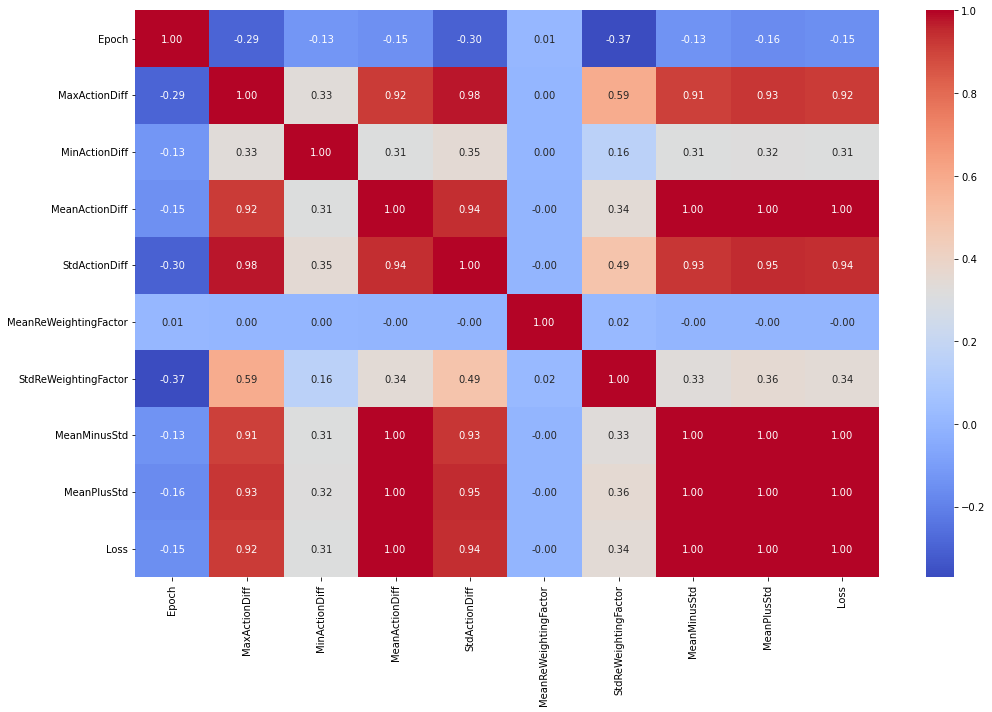

In [20]:
pd.set_option('display.max_columns', None)

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.savefig('plotting relationships in the dataset.png', dpi=330)
plt.savefig('plotting relationships in the dataset.pdf', dpi=330) 
plt.show()

# Inference:
1. Highly correlated variables to Std are:`MaxActionDiff`, `MeanPlusStd`, `Loss`, `MeanActionDiff` & `MeanMinusStd`.

# Step 5.4: High correlated variables plot

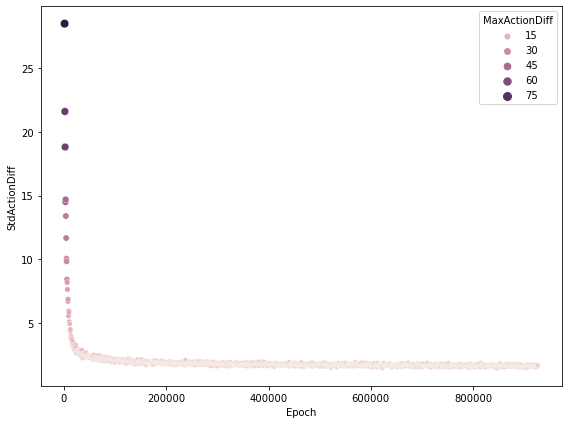

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x="Epoch", y="StdActionDiff", hue="MaxActionDiff", size="MaxActionDiff")
plt.xlabel('Epoch')
plt.ylabel('StdActionDiff')

plt.tight_layout()
#plt.savefig('Std high correlated variables plot.png', dpi=330)
plt.savefig('Std high correlated variables plot Max.pdf', dpi=330) 
plt.show()

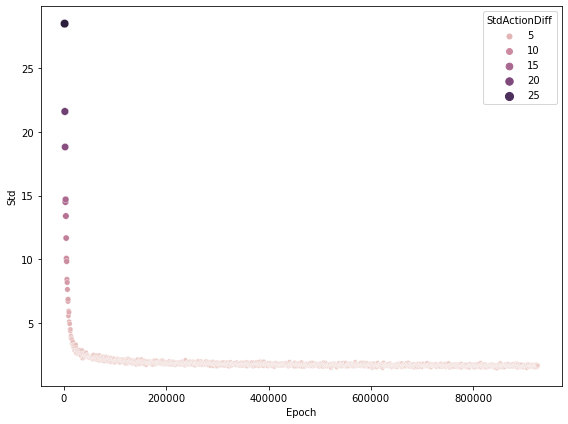

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x="Epoch", y="StdActionDiff", hue="StdActionDiff", size="StdActionDiff")
plt.xlabel('Epoch')
plt.ylabel('Std')
plt.tight_layout()
#plt.savefig('Std high correlated variables plot Std.png', dpi=330)
plt.savefig('Std high correlated variables plot Std.pdf', dpi=330) 
plt.show()


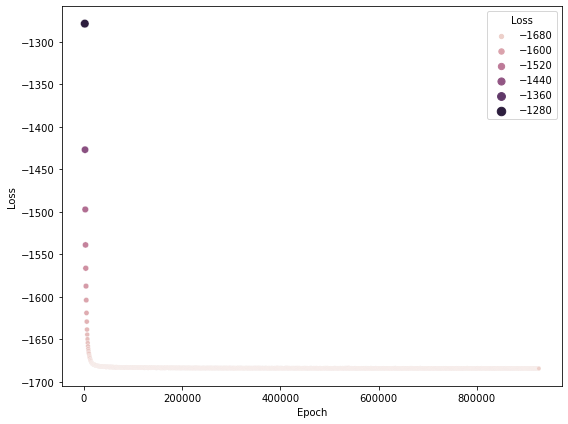

In [24]:


plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x="Epoch", y="Loss", hue="Loss", size="Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
#plt.savefig('Loss high correlated variables plot.png', dpi=330)
plt.savefig('Loss high correlated variables plot.pdf', dpi=330) 
plt.show()

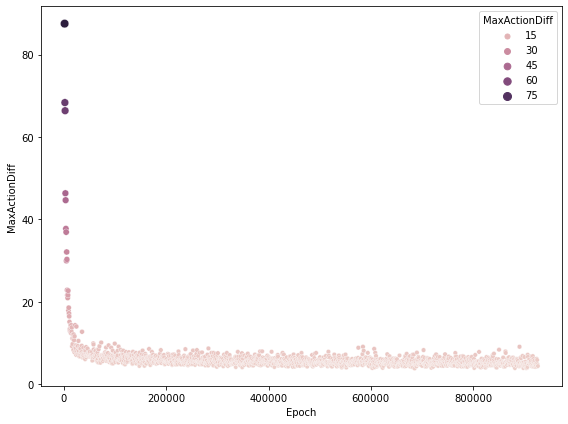

In [25]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x="Epoch", y="MaxActionDiff", hue="MaxActionDiff", size="MaxActionDiff")
plt.xlabel('Epoch')
plt.ylabel('MaxActionDiff')
plt.tight_layout()
#plt.savefig('Std high correlated variables plot.png', dpi=330)
plt.savefig('Max high correlated variables plot .pdf', dpi=330) 
plt.show()

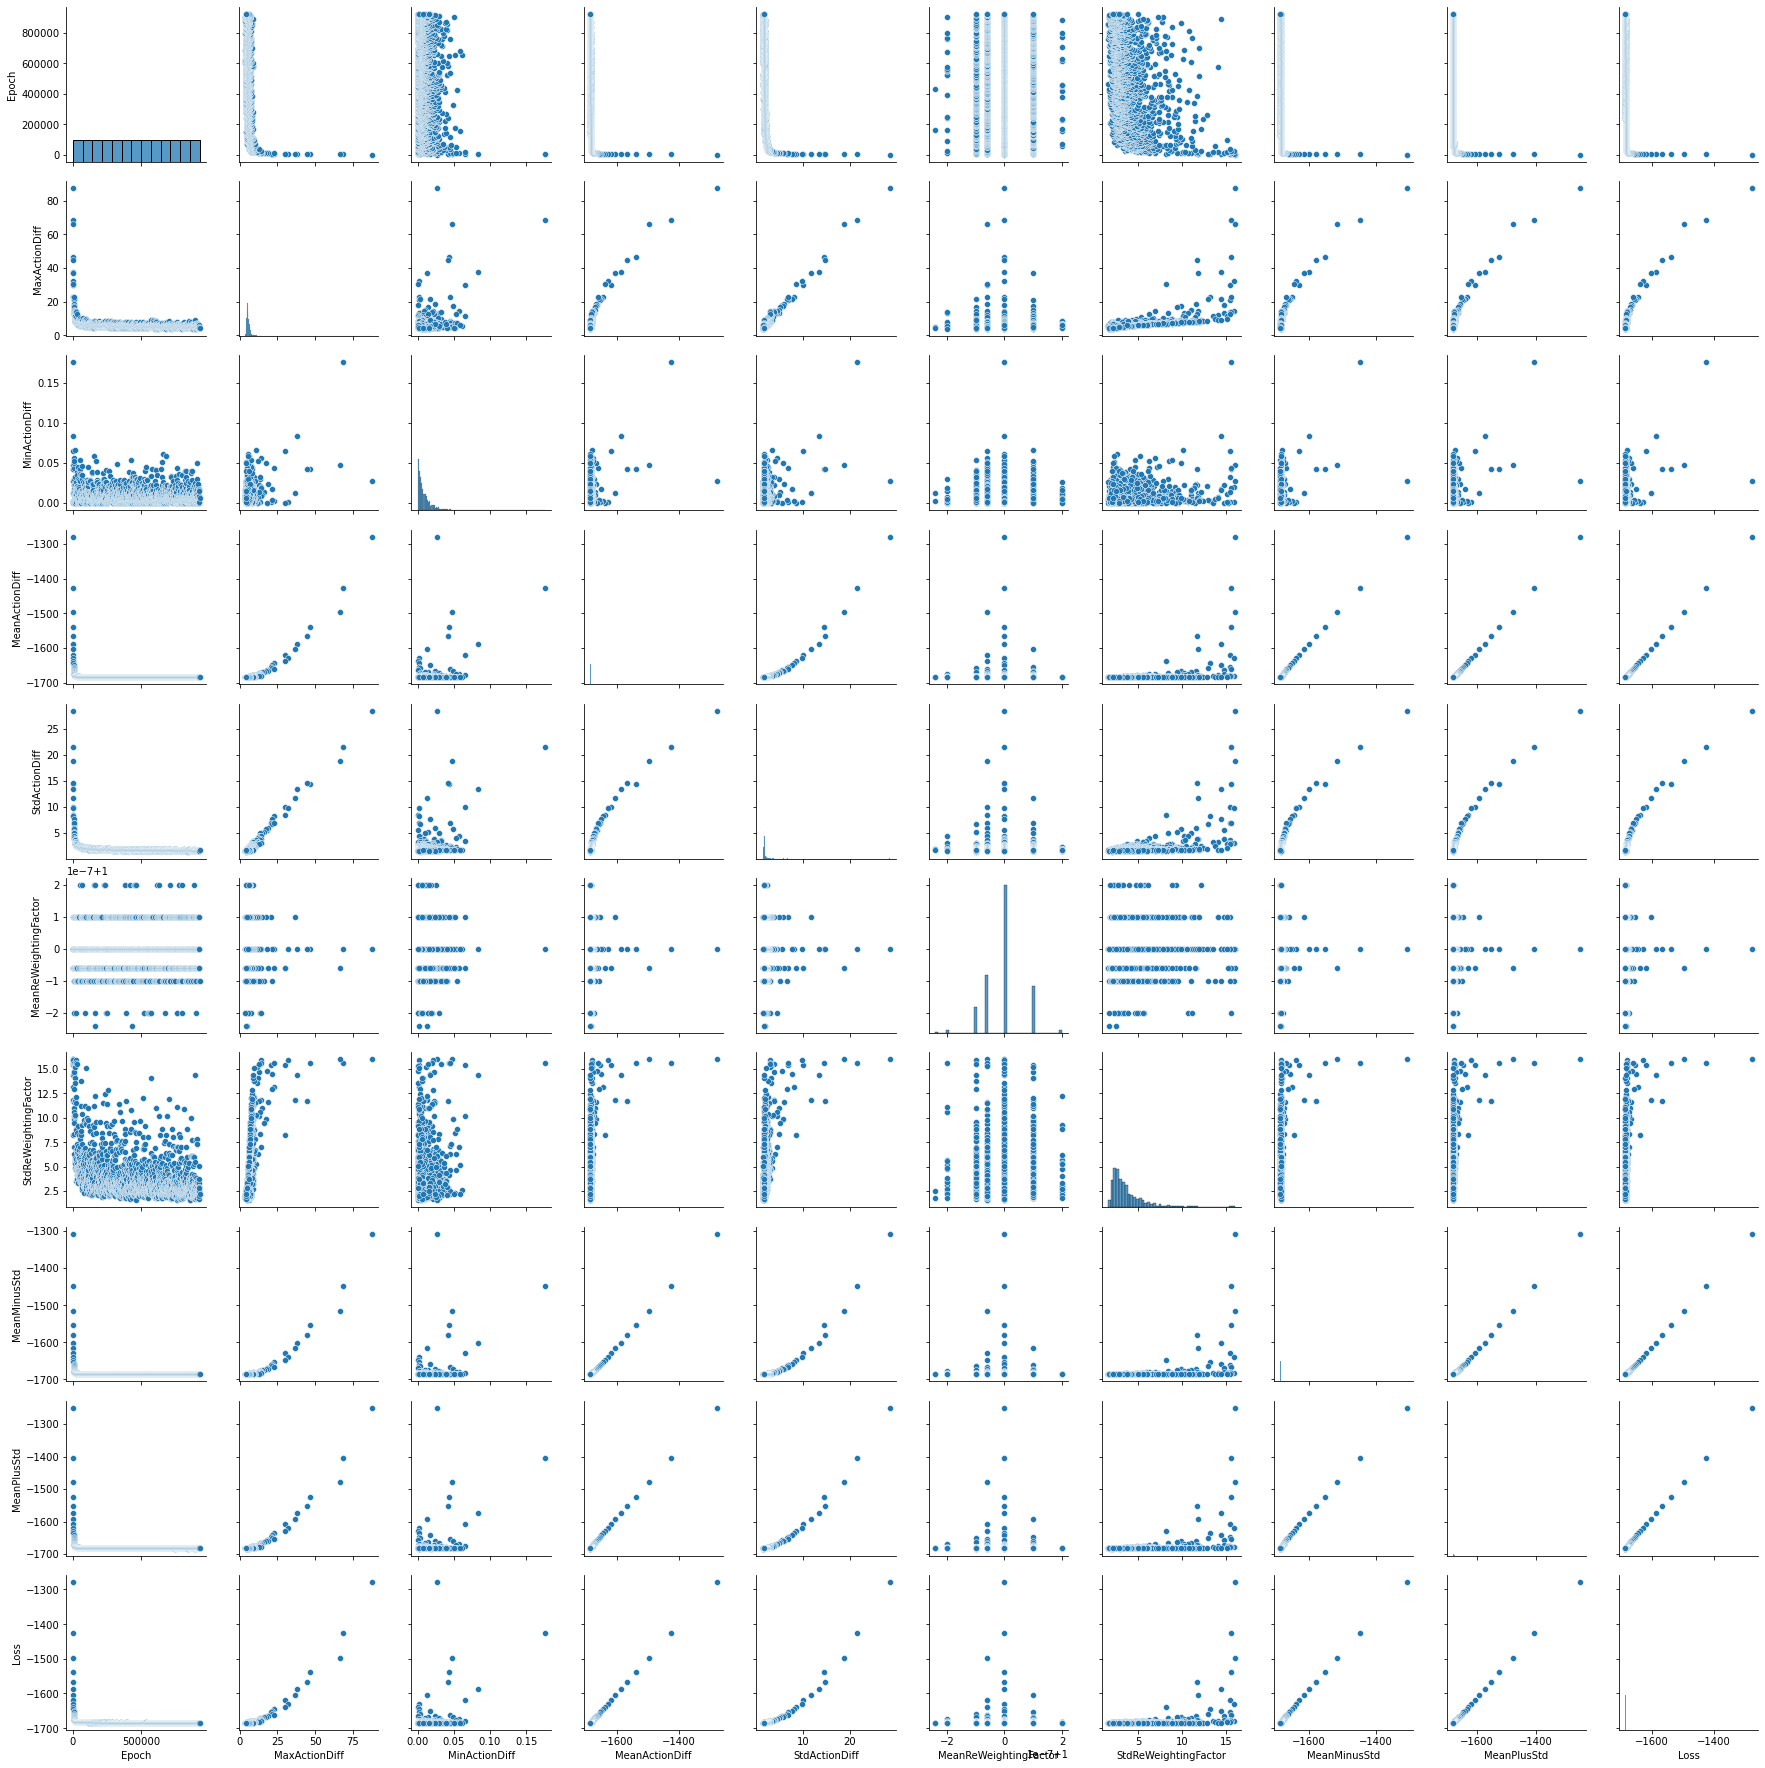

In [27]:
sns.pairplot(dataset)
plt.savefig('Data pairplot.pdf', dpi=330) 
plt.show()

# Step 6: Convert object variables

    1. Checking data
    2. Convert object variables

In [28]:
#observe the type for each feature of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 3 to 1853
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Epoch                  1851 non-null   int64  
 1   MaxActionDiff          1851 non-null   float64
 2   MinActionDiff          1851 non-null   float64
 3   MeanActionDiff         1851 non-null   float64
 4   StdActionDiff          1851 non-null   float64
 5   MeanReWeightingFactor  1851 non-null   float64
 6   StdReWeightingFactor   1851 non-null   float64
 7   MeanMinusStd           1851 non-null   float64
 8   MeanPlusStd            1851 non-null   float64
 9   Loss                   1851 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 159.1 KB


In [29]:
print (dataset.dtypes)

Epoch                      int64
MaxActionDiff            float64
MinActionDiff            float64
MeanActionDiff           float64
StdActionDiff            float64
MeanReWeightingFactor    float64
StdReWeightingFactor     float64
MeanMinusStd             float64
MeanPlusStd              float64
Loss                     float64
dtype: object


# Step 7: Plotting new relationships 

In [30]:

#Plotting relationships in the dataset. 
pd.set_option('display.max_columns', None)
dataset.describe()

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000
mean,464000.000000,6.069799,0.008962,-1682.978233,1.898743,1.000000e+00,3.938477,-1684.876975,-1681.079489,-1682.880388
std,267240.996107,3.739244,0.010301,13.371623,1.161084,6.391056e-08,2.301543,12.284796,14.469989,13.365473
min,1500.000000,3.786255,0.000000,-1684.622600,1.412894,9.999998e-01,1.577429,-1686.371100,-1682.973000,-1684.471600
25%,232750.000000,4.991699,0.002319,-1684.210850,1.648577,9.999999e-01,2.522199,-1685.910200,-1682.551050,-1684.124400
50%,464000.000000,5.509521,0.005859,-1684.094700,1.730214,1.000000e+00,3.192901,-1685.800400,-1682.376200,-1683.998900
75%,695250.000000,6.310730,0.011963,-1683.898650,1.851269,1.000000e+00,4.495003,-1685.655400,-1682.080600,-1683.792450
max,926500.000000,87.537110,0.175537,-1278.709700,28.498280,1.000000e+00,15.999970,-1307.208000,-1250.211400,-1278.707600


In [31]:
#checking for outliers values and remove them
z_scores=stats.zscore(dataset)
abs_z_scores=np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_dataset = dataset[filtered_entries]

In [32]:
dataset.head()

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss
3,1500,87.537110,0.026855,-1278.7097,28.498280,1.0,15.999970,-1307.2080,-1250.2114,-1278.7076
4,2000,68.370850,0.175537,-1426.9910,21.598984,1.0,15.592285,-1448.5900,-1405.3920,-1426.9893
5,2500,66.399050,0.047729,-1497.2865,18.810913,1.0,15.993827,-1516.0974,-1478.4756,-1497.2847
6,3000,46.354126,0.042847,-1539.0340,14.493311,1.0,15.640333,-1553.5273,-1524.5408,-1539.0305
7,3500,44.667725,0.042236,-1566.4636,14.689493,1.0,11.763913,-1581.1531,-1551.7742,-1566.4606


In [33]:
#
dataset.describe()

,Epoch,MaxActionDiff,MinActionDiff,MeanActionDiff,StdActionDiff,MeanReWeightingFactor,StdReWeightingFactor,MeanMinusStd,MeanPlusStd,Loss
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000
mean,464000.000000,6.069799,0.008962,-1682.978233,1.898743,1.000000e+00,3.938477,-1684.876975,-1681.079489,-1682.880388
std,267240.996107,3.739244,0.010301,13.371623,1.161084,6.391056e-08,2.301543,12.284796,14.469989,13.365473
min,1500.000000,3.786255,0.000000,-1684.622600,1.412894,9.999998e-01,1.577429,-1686.371100,-1682.973000,-1684.471600
25%,232750.000000,4.991699,0.002319,-1684.210850,1.648577,9.999999e-01,2.522199,-1685.910200,-1682.551050,-1684.124400
50%,464000.000000,5.509521,0.005859,-1684.094700,1.730214,1.000000e+00,3.192901,-1685.800400,-1682.376200,-1683.998900
75%,695250.000000,6.310730,0.011963,-1683.898650,1.851269,1.000000e+00,4.495003,-1685.655400,-1682.080600,-1683.792450
max,926500.000000,87.537110,0.175537,-1278.709700,28.498280,1.000000e+00,15.999970,-1307.208000,-1250.211400,-1278.707600


# Step 7: Remove no used values
1. Delete no used columns

In [34]:
del dataset['MaxActionDiff']
del dataset['MinActionDiff']
del dataset['MeanActionDiff']
del dataset['MeanReWeightingFactor']
del dataset['StdReWeightingFactor']
del dataset['MeanMinusStd']
del dataset['MeanPlusStd']
del dataset['Loss']

In [35]:
dataset.head()

,Epoch,StdActionDiff
3,1500,28.498280
4,2000,21.598984
5,2500,18.810913
6,3000,14.493311
7,3500,14.689493


# Step 8: Model Development
1. Define y output and define x input(s)
2. Define preprocessing (scaler)
3. Train models
4. Evaluate models
5. Optimize best models via hyperparameters
6. Evaluate the models
7. Keep the best model

# Step 8.1: Define y output and define x input(s)

In [36]:
#DECLARE Y COLUMN(Note: y is the output of our model)
y = dataset['StdActionDiff']
#REMOVE-DROP THE UNNECESSARY COLUMNS(Note: X axis is the inputs of our model)
X = dataset.drop(['StdActionDiff'], axis=1)


#PRINT X AN Y IN CONSOLE
X.head()
y.head()
#SPLIT THE DATASET TO TRAIN AND TEST(Note: random_state keep stady the prices of dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.20, random_state=42)
pd.set_option('display.max_rows', X_train.shape[0]+1)
pd.set_option('display.max_rows', X_val.shape[0]+1)
pd.set_option('display.max_rows', y_train.shape[0]+1)
pd.set_option('display.max_rows', y_val.shape[0]+1)
pd.set_option('display.max_rows', X.shape[0]+1)
pd.set_option('display.max_rows', y.shape[0]+1)
#PRINT IN FILE THE RESULTS OF THE XTRAIN SET
f = open("ActualDataset_X_testing.txt", "w")
f.write(str(X_val))
f.close()
#PRINT IN FILE THE RESULTS OF THE XTRAIN SET
f = open("ActualDataset_X_training.txt", "w")
f.write(str(X_train))
f.close()
#PRINT IN FILE THE RESULTS OF THE XTRAIN SET
f = open("ActualDataset_Y_training.txt", "w")
f.write(str(y_train))
f.close()
#PRINT IN FILE THE RESULTS OF THE XTRAIN SET
f = open("ActualDataset_Y_testing.txt", "w")
f.write(str(y_val))
f.close()
#PRINT IN FILE THE RESULTS OF THE XTRAIN SET
f = open("ActualDataset_X.txt", "w")
f.write(str(X))
f.close()
#PRINT IN FILE THE RESULTS OF THE YTRAIN SET
f = open("ActualDataset_Y.txt", "w")
f.write(str(y))
f.close()


# Step 8.2: Define preprocessing (scaler)

In [38]:
#SCALE OUR DATA BY CREATING AN INSTANCE OF THE SCALER AND SCALING IT:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', X_train.shape[0]+1)
pd.set_option('display.max_rows', X_val.shape[0]+1)
f = open("ActualDataset_X_testingScale.txt", "w")
f.write(str(X_val))
f.close()
f = open("ActualDataset_X_trainingScale.txt", "w")
f.write(str(X_train))
f.close()

# Step 8.3: Train models

In [39]:
# Develop the models with default hyperparameters
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
svm_reg = SVR()
gb_reg = GradientBoostingRegressor()

#Train the models
lr_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
vot_reg = VotingRegressor([("lr", lr_reg), ("dt", dt_reg), ("rf", rf_reg), ("svm", svm_reg), ("gb", gb_reg)])
vot_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('rf', RandomForestRegressor()), ('svm', SVR()),
                            ('gb', GradientBoostingRegressor())])

# Step 8.4: Evaluate the models

In [40]:
#Evaluate the models
lr_pred = lr_reg.predict(X_val)
dt_pred = dt_reg.predict(X_val)
rf_pred = rf_reg.predict(X_val)
svm_pred = svm_reg.predict(X_val)
gb_pred = gb_reg.predict(X_val)
vot_pred = vot_reg.predict(X_val)

In [41]:
#Evaluate the models based on MSE, R2 and MAE metrics
print(lr_reg)
print("Mean squared error: %.2f" % mean_squared_error(y_val, lr_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, lr_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, lr_pred))

print()

print(dt_reg)
print("Mean squared error: %.2f" % mean_squared_error(y_val, dt_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, dt_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, dt_pred))

print()

print(rf_reg)
print("Mean squared error: %.2f" % mean_squared_error(y_val, rf_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, rf_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, rf_pred))

print()

print(svm_reg)
print("Mean squared error: %.2f" % mean_squared_error(y_val, svm_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, svm_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, svm_pred))

print()

print(gb_reg)
print("Mean squared error: %.2f" % mean_squared_error(y_val, gb_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, gb_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, gb_pred))

print()

print(vot_reg)
print()
print("Mean squared error: %.2f" % mean_squared_error(y_val, vot_pred))
print("Coefficient of determination R2: %.2f" % r2_score(y_val, vot_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, vot_pred))

LinearRegression()
Mean squared error: 0.11
Coefficient of determination: -0.21
Mean Absolute Error 0.28

DecisionTreeRegressor()
Mean squared error: 0.02
Coefficient of determination: 0.82
Mean Absolute Error 0.10

RandomForestRegressor()
Mean squared error: 0.01
Coefficient of determination: 0.87
Mean Absolute Error 0.08

SVR()
Mean squared error: 0.02
Coefficient of determination: 0.81
Mean Absolute Error 0.08

GradientBoostingRegressor()
Mean squared error: 0.01
Coefficient of determination: 0.91
Mean Absolute Error 0.07

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('rf', RandomForestRegressor()), ('svm', SVR()),
                            ('gb', GradientBoostingRegressor())])

Mean squared error: 0.02
Coefficient of determination R2: 0.84
Mean Absolute Error 0.09


In [46]:
f = open("ModelsPerformanceTableTestingDataset.txt", "w")
f.write("Model"+"\t"+"MeanSquearedError(MSE)"+"\t"+"CoefficientofDetermination(R2)"+"\t"+"MeanAbsoluteError(MAE)\n")
f.write(str(lr_reg)+"\t"+str(mean_squared_error(y_val, lr_pred))+"\t"+str(r2_score(y_val, lr_pred))+"\t"+str(mean_absolute_error(y_val, lr_pred))+"\n")
f.write(str(dt_reg)+"\t"+str(mean_squared_error(y_val, dt_pred))+"\t"+str(r2_score(y_val, dt_pred))+"\t"+str(mean_absolute_error(y_val, dt_pred))+"\n")
f.write(str(rf_reg)+"\t"+str(mean_squared_error(y_val, rf_pred))+"\t"+str(r2_score(y_val, rf_pred))+"\t"+str(mean_absolute_error(y_val, rf_pred))+"\n")
f.write(str(svm_reg)+"\t"+str(mean_squared_error(y_val, svm_pred))+"\t"+str(r2_score(y_val, svm_pred))+"\t"+str(mean_absolute_error(y_val, svm_pred))+"\n")
f.write(str(gb_reg)+"\t"+str(mean_squared_error(y_val, gb_pred))+"\t"+str(r2_score(y_val, gb_pred))+"\t"+str(mean_absolute_error(y_val, gb_pred))+"\n")
f.write(str("VotingRegressor")+"\t"+str(mean_squared_error(y_val, vot_pred))+"\t"+str(r2_score(y_val, vot_pred))+"\t"+str(mean_absolute_error(y_val, vot_pred))+"\n")
f.close()



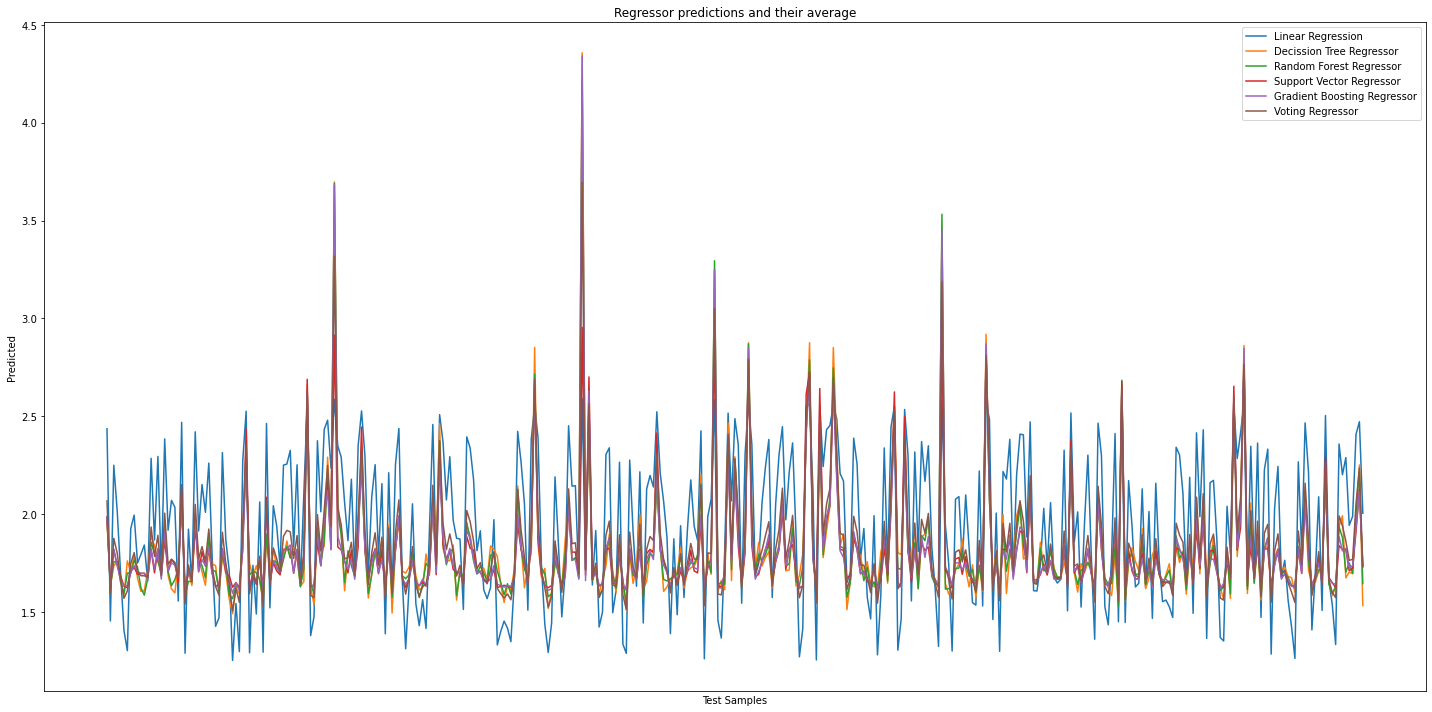

In [48]:
#Plot the predicted values of the models
plt.figure(figsize=(20,10))
plt.plot(lr_pred, label="Linear Regression")
plt.plot(dt_pred, label="Decission Tree Regressor")
plt.plot(rf_pred, label="Random Forest Regressor")
plt.plot(svm_pred, label="Support Vector Regressor")
plt.plot(gb_pred, label="Gradient Boosting Regressor")
plt.plot(vot_pred, ms=10, label="Voting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Test Samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.tight_layout()
#plt.savefig('Models Prediction.png', dpi=330)
plt.savefig('Models Performance.pdf', dpi=330)
plt.show()

In [49]:
#Embed Actual and Predicted variables on the main dataset
testTable = pd.DataFrame({'Actual_Std': y_val, 
                          'Predicted_LR': lr_pred, 
                          'Predicted_DT': dt_pred,
                          'Predicted_RF': rf_pred,
                          'Predicted_SVR': svm_pred,
                          'Predicted_GB': gb_pred,  
                          'Predicted_VOT': vot_pred }) 

In [50]:
#Embed Actual and Predicted variables on the main dataset
testTable=pd.concat([dataset, testTable], axis=1)

In [51]:
#Remove NA values to keep only test sample
testTable = testTable.dropna()

In [52]:
testTable.to_csv("ModelsPredictionValues_vs_ActualTestingDatasetValues", sep='\t')

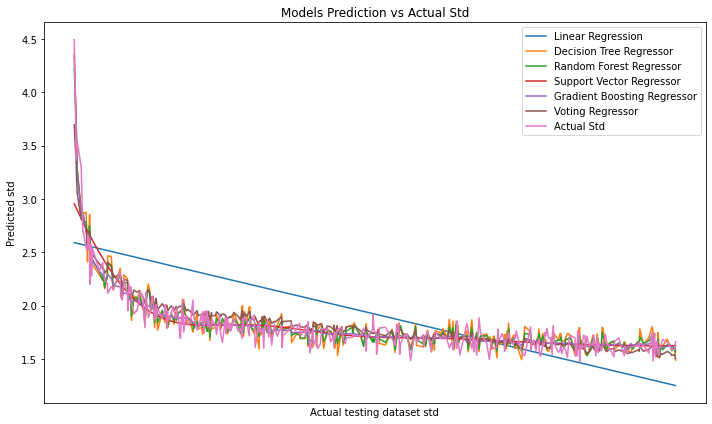

In [58]:
#Plot the predicted values of the models with the actual values
plt.figure(figsize=(10,6))
plt.plot(testTable.Predicted_LR, label="Linear Regression")
plt.plot(testTable.Predicted_DT, label="Decision Tree Regressor")
plt.plot(testTable.Predicted_RF, label="Random Forest Regressor")
plt.plot(testTable.Predicted_SVR, label="Support Vector Regressor")
plt.plot(testTable.Predicted_GB, label="Gradient Boosting Regressor")
plt.plot(testTable.Predicted_VOT, label="Voting Regressor")
plt.plot(testTable.Actual_Std, label="Actual Std")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted std")
plt.xlabel("Actual testing dataset std")
plt.legend(loc="best")
plt.title("Models Prediction vs Actual Std")
plt.tight_layout()
#plt.savefig('Models Prediction vs Actual.png', dpi=330)
plt.savefig('Models Prediction vs Actual Std.pdf', dpi=330)
plt.show()

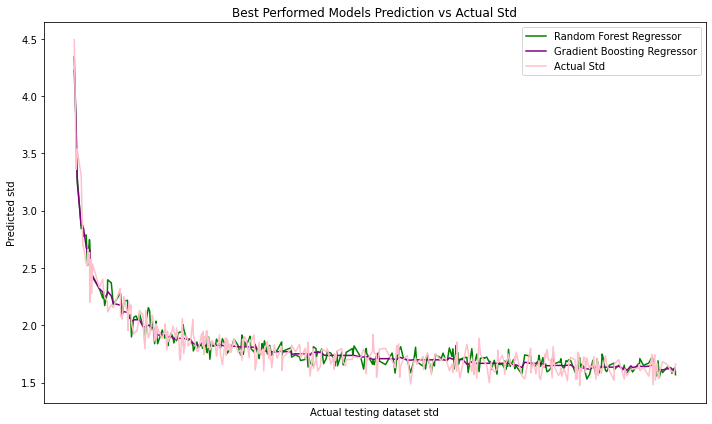

In [57]:
#Plot the predicted values of the models with the actual values
plt.figure(figsize=(10,6))
plt.plot(testTable.Predicted_RF, label="Random Forest Regressor", color='green')
plt.plot(testTable.Predicted_GB, label="Gradient Boosting Regressor", color='purple')
plt.plot(testTable.Actual_Std, label="Actual Std", color='pink')

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted std")
plt.xlabel("Actual testing dataset std")
plt.legend(loc="best")
plt.title("Best Performed Models Prediction vs Actual Std")
plt.tight_layout()
#plt.savefig('Models Prediction vs Actual.png', dpi=330)
plt.savefig('Best Performed Models Prediction vs Actual Std.pdf', dpi=330)
plt.show()

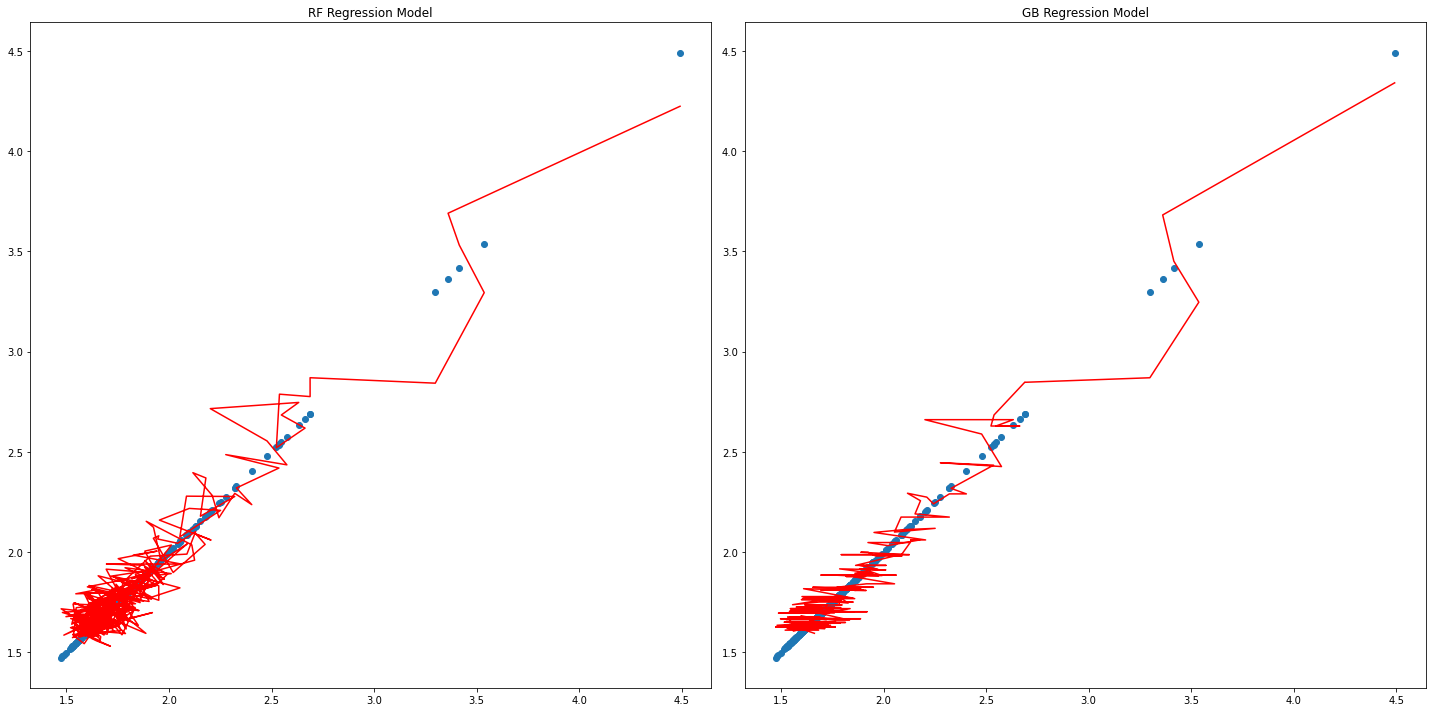

In [59]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
x_axis=testTable.StdActionDiff
y_axis=testTable.Actual_Std
y1_axis=testTable.Predicted_RF
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("RF Regression Model")

plt.subplot(1,2,2)
x_axis=testTable.StdActionDiff
y_axis=testTable.Actual_Std
y1_axis=testTable.Predicted_GB
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("GB Regression Model")
plt.tight_layout()
#plt.savefig('Random Forest & Gradient Boosting Models Performance.png', dpi=330)
plt.savefig('Random Forest & Gradient Boosting Models Performance.pdf', dpi=330)
plt.show()

# Step 8.5: Best performed models optimization

In [ ]:
##GRADIENT BOOSTING ALGORITHM
#print(gb_reg)
#print("Mean squared error: %.2f" % mean_squared_error(y_val, gb_pred))
#print("Coefficient of determination: %.2f" % r2_score(y_val, gb_pred))
#print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, gb_pred))

##DECLARE A LIST'S WITH THE HYPERPARAMETERS 
lr_list=[0.0001, 0.001, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators_list=[20, 40, 60, 80, 100, 200]
max_depth_list=[1, 2 ,3, 4, 5, 6, 7, 8, 9, 10]
min_samples_leaf_list=[1,2,3,4,5,6,7,8,9,10]
max_leaf_nodes_list=[2,3,4,5,6,7,8,9,10]

##PRINT IN FILE THE RESULTS OF TRAINING AND VALIDATION FOR EACH LIST COMBINATION VALUE
##(Note: We do that in order to be able to choose the best learning rate, n estimators, max features, 
## and max depth for our model)
f = open("GradientBoostingRegressorOptimizationResults.txt", "w")
f.write("Learning_rate\tN_estimators\tMax_depth\tMin_samples\tMax_leaf\tR2(training)\tR2(validation)\n")
for learning_rate in lr_list:
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            for min_samples_leaf in min_samples_leaf_list:
                for max_leaf_nodes in max_leaf_nodes_list:
                    gb_reg_opt = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes, random_state=42)
                    gb_reg_opt.fit(X_train, y_train)
                    f.write(str(learning_rate)+"\t"+str(n_estimators)+"\t"+str(max_depth)+"\t"+str(min_samples_leaf)+"\t"+str(max_leaf_nodes)+"\t"+str(gb_reg_opt.score(X_train, y_train))+"\t"+str(gb_reg_opt.score(X_val, y_val))+"\n")
                    print("Learning rate: ", learning_rate)
                    print("N estimator: ", n_estimators)
                    print("Max depth: ", max_depth)
                    print("Min samples leaf: ", min_samples_leaf)
                    print("Max_leaf_nodes: ", max_leaf_nodes)
                    print("R2 (training): {0:.3f}".format(gb_reg_opt.score(X_train, y_train)))
                    print("R2 (validation): {0:.3f}".format(gb_reg_opt.score(X_val, y_val)))
                    print("MSE (training): {0:.3f}".format(gb_reg_opt.mean_squared_error(X_train, y_train)))
                    print("MSE (validation): {0:.3f}".format(gb_reg_opt.mean_squared_error(X_val, y_val)))
                    print("######################################")
f.close()
print("GB Training and Validation")  

In [ ]:
#Open GB optimazitation file
gb_dataset=pd.read_csv("GradientBoostingRegressorOptimizationResults.txt",  delim_whitespace=True)
#Converted to csv
gb_dataset.to_csv('GradientBoostingRegressorOptimizationResults.csv', index = None)

In [ ]:
#Shorted per validation and training and keep the best hyperparameters
gb_dataset.sort_values(by=['R2(validation)', 'R2(training)'], ascending=False)

In [ ]:
##RANDOM FOREST ALGORITHM

##DECLARE A LIST'S WITH THE HYPERPARAMETERS 
n_estimators_list=[20, 40, 60, 80, 100, 200]
max_depth_list=[2 ,3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_list=[2,3,4,5,6,7,8,9,10]
min_samples_leaf_list=[1,2,3,4,5,6,7,8,9,10]

##PRINT IN FILE THE RESULTS OF TRAINING AND VALIDATION FOR EACH LIST COMBINATION VALUE
##(Note: We do that in order to be able to choose the best learning rate, n estimators, max features, 
## and max depth for our model)
f = open("RandomForestRegressorOptimizationResults.txt", "w")
f.write("N_estimators\tMax_depth\tMin_samples_split\tMin_samples_leaf\tR2(training)\tR2(validation)\n")
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                rf_reg_opt = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,  min_samples_leaf=min_samples_leaf, random_state=42)
                rf_reg_opt.fit(X_train, y_train)
                f.write(str(n_estimators)+"\t"+str(max_depth)+"\t"+str(min_samples_split)+"\t"+str(min_samples_leaf)+"\t"+str(rf_reg_opt.score(X_train, y_train))+"\t"+str(rf_reg_opt.score(X_val, y_val))+"\n")
                print("N estimator: ", n_estimators)
                print("Max depth: ", max_depth)
                print("Min samples split: ", min_samples_split)
                print("min_samples_leaf: ", min_samples_leaf)
                print("R2 (training): {0:.3f}".format(rf_reg_opt.score(X_train, y_train)))
                print("R2 (validation): {0:.3f}".format(rf_reg_opt.score(X_val, y_val)))
                print("######################################")
f.close()
print("RF Training and Validation")  

In [ ]:
#Open RF optimazitation file
rf_dataset=pd.read_csv("RandomForestRegressorOptimizationResults.txt",  delim_whitespace=True)
#Converted to csv
rf_dataset.to_csv('RandomForestRegressorOptimizationResults.csv', index = None)

In [ ]:
#Shorted per validation and training and keep the best hyperparameters
rf_dataset.sort_values(by=['R2(training)', 'R2(validation)'], ascending=False)

In [ ]:
# Develop optimized models with best hyperparameters
rf_reg_opt = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_reg_opt = GradientBoostingRegressor(learning_rate=0.25, n_estimators=60,  max_depth=3, min_samples_leaf=2, max_leaf_nodes=6, random_state=42)
# Train optimized models with best hyperparameters
rf_reg_opt.fit(X_train, y_train)
gb_reg_opt.fit(X_train, y_train)

# Step 8.6: Evaluate best models

In [ ]:
# Evaluate optimized models with best hyperparameters
rf_reg_opt_pred = rf_reg_opt.predict(X_val)
gb_reg_opt_pred = gb_reg_opt.predict(X_val)

In [ ]:
#Evaluate the optimized models based on MSE, R2 and MAE metrics
print(rf_reg_opt)
print("Mean squared error: %.2f" % mean_squared_error(y_val, rf_reg_opt_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, rf_reg_opt_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, rf_reg_opt_pred))

print()

print(gb_reg_opt)
print("Mean squared error: %.2f" % mean_squared_error(y_val, gb_reg_opt_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, gb_reg_opt_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_val, gb_reg_opt_pred))


In [ ]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,10))
sns.distplot((y_val - gb_reg_opt_pred), bins = 20)
fig.suptitle('GB Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.tight_layout()
plt.savefig('GB Error Terms.png', dpi=330)
plt.savefig('GB Error Terms.pdf', dpi=330)
plt.show()

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,10))
sns.distplot((y_val - rf_reg_opt_pred), bins = 20)
fig.suptitle('RF Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.tight_layout()
plt.savefig('RF Error Terms.png', dpi=330)
plt.savefig('RF Error Terms.pdf', dpi=330)
plt.show()

# Inference:
1. GB regressor is the best model with R2=0.92

In [ ]:
#Plot the predicted values of the OPTIMIZED models 
plt.figure(figsize=(20,10))
plt.plot(rf_reg_opt_pred, label="RF")
plt.plot(gb_reg_opt_pred, label="GB")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted std")
plt.xlabel("Actual testing data std")
plt.legend(loc="best")
plt.title("Optimized models predicted values")
plt.tight_layout()
plt.savefig('Optimized Models Prediction.png', dpi=330)
plt.savefig('Optimized Models Prediction.pdf', dpi=330)
plt.show()

In [ ]:
#Embed actual and predicted optimized models values
dt_opt = pd.DataFrame({'Actual': y_val, 'Predicted_GB_opt': gb_reg_opt_pred,  'Predicted_RF_opt': rf_reg_opt_pred}) 

In [ ]:
#Embed actual and predicted optimized models values

dt_opt=pd.concat([dataset, dt_opt], axis=1)

In [ ]:
#Remove NA samples to keep only test samples
dt_opt = dt_opt.dropna()

In [ ]:
#Show new table
dt_opt

In [ ]:
#Plot the predicted values of the OPTIMIZED models VS ACTUAL

plt.figure(figsize=(20,10))
plt.plot(dt_opt.Predicted_RF_opt, label="RF")
plt.plot(dt_opt.Predicted_GB_opt, label="GB")
plt.plot(dt_opt.Actual, label="Actual std")
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")
plt.tight_layout()
plt.savefig('Optimized Models Predicted std vs Actual std.png', dpi=330)
plt.savefig('Optimized Models Predicted std vs ACTUAL.pdf', dpi=330)
plt.show()

# Step 8.7: Keep the best model

In [ ]:
#Save the best model
filename = 'CPP_GB.sav'
pickle.dump(gb_reg_opt, open(filename, 'wb'))

In [ ]:
#Test the best model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_val, y_val)
print(result)